## Decision Tree Classifer

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Loding the dataset

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Spliting the dataset into feature(x) and target variable(y)

In [8]:
X= df.drop(['Outcome'], axis=1)
X


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [7]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Splitting the data into train and test 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
# Creating a Decison Tree Classifier 
model = DecisionTreeClassifier()

In [14]:
#fitting the model on the trainign dataset 
model = model.fit(X_train, y_train)

In [16]:
# predicting the model on the test dataset
y_pred = model.predict(X_test)

In [17]:
# Checking the accuracy, so that we can hoe well the model predicts
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 69.6969696969697


### Model Optimization using Pruning 

In [23]:
model2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7705627705627706


### Visualization 

In [28]:
features = x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

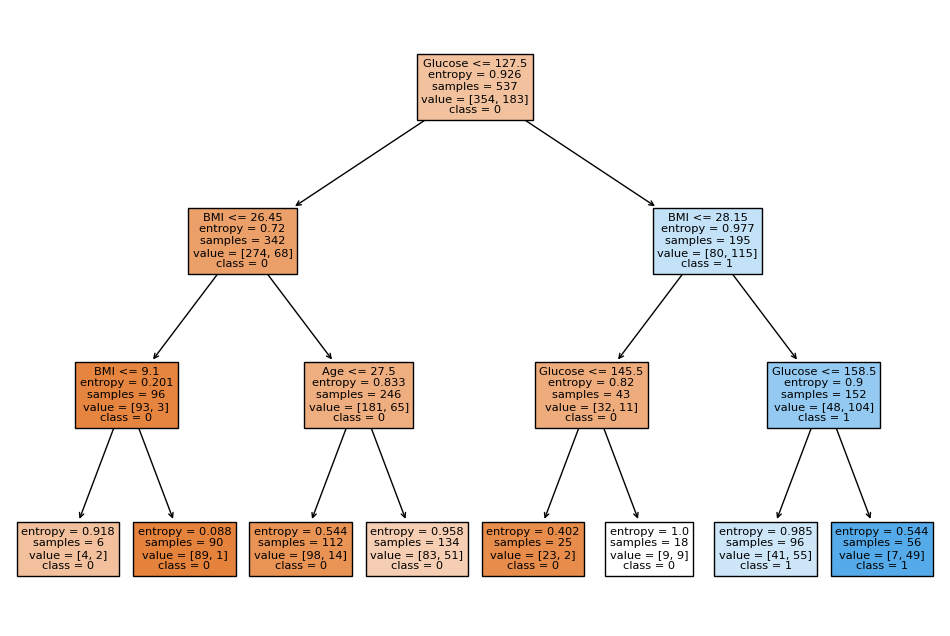

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Convert feature names to a list
plot_tree(model2, 
          feature_names=list(features),  # Convert to list
          class_names=['0', '1'], 
          filled=True)

plt.show()
